In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sukhmandeepsinghbrar/car-price-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/xjama/.cache/kagglehub/datasets/sukhmandeepsinghbrar/car-price-prediction-dataset/versions/1


In [2]:
import os

# List the files in the downloaded dataset directory
files = os.listdir(path)
print("Files in dataset folder:", files)

Files in dataset folder: ['cardekho.csv']


In [3]:
!pip install kagglehub

# Read the data

In [4]:
import pandas as pd
import os

# Assuming the CSV file is in the downloaded dataset folder
csv_file = os.path.join(path, 'cardekho.csv')  # Replace with the correct file name

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame
print(df.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

  max_power  seats  
0        74    5.0  
1    103.52    5.0  
2        78    5.0  
3        90    5.0  
4      88.2

# EDA

In [5]:
print(df.shape)

(8128, 12)


In [6]:
print(df.dtypes)

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object


In [7]:
pd.set_option('display.float_format', '{:,.2f}'.format)
print(df['selling_price'].describe())

count        8,128.00
mean       638,271.81
std        806,253.40
min         29,999.00
25%        254,999.00
50%        450,000.00
75%        675,000.00
max     10,000,000.00
Name: selling_price, dtype: float64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [9]:
print(df.isnull().sum())

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


In [10]:
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent.round(2))

name                 0.00
year                 0.00
selling_price        0.00
km_driven            0.00
fuel                 0.00
seller_type          0.00
transmission         0.00
owner                0.00
mileage(km/ltr/kg)   2.72
engine               2.72
max_power            2.65
seats                2.72
dtype: float64


# Data Cleaning

In [11]:
df_clean = df.drop_duplicates()
print(f"Deleted {df.shape[0]-df_clean.shape[0]} duplicated rows")

Deleted 1202 duplicated rows


In [12]:
print(df.isnull().sum())

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


# EDA Plotting

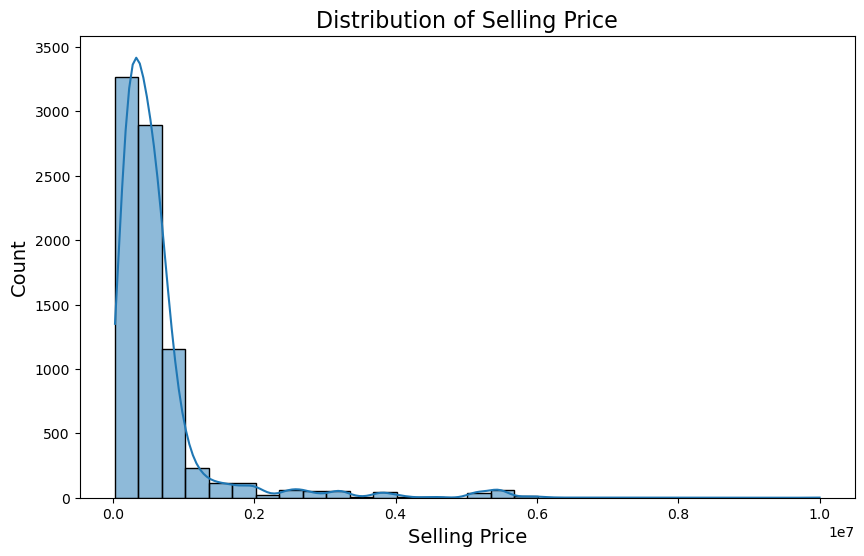

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribution of Selling Price', fontsize=16)
plt.xlabel('Selling Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [14]:
plt.figure(figsize=(8,5))

df['km_driven'].plot.hist(bins=int(np.sqrt(df.shape[0])), alpha=0.7)   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('Kilometers driven')
plt.ylabel('count')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

NameError: name 'np' is not defined

<Figure size 800x500 with 0 Axes>

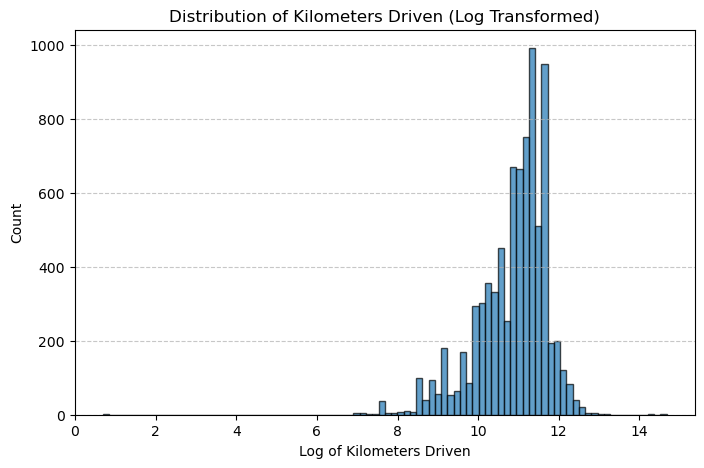

In [87]:
plt.figure(figsize=(8,5))

np.log1p(df['km_driven']).plot.hist(
    bins=int(np.sqrt(df.shape[0])), 
    alpha=0.7, edgecolor='black'
)
plt.xlabel('Log of Kilometers Driven')
plt.ylabel('Count')
plt.title('Distribution of Kilometers Driven (Log Transformed)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

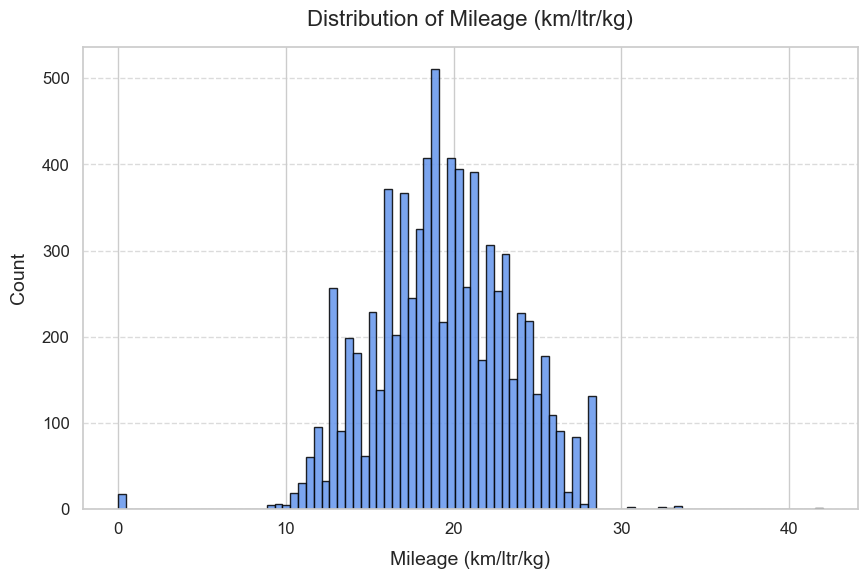

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set a seaborn style
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))

# Plot a histogram with improved aesthetics
df['mileage(km/ltr/kg)'].plot.hist(
    bins=int(np.sqrt(df.shape[0])), 
    alpha=0.85,  # Slightly reduce transparency
    color='cornflowerblue',  # Aesthetic color choice
    edgecolor='black'  # Add borders for bars
)

# Add labels and title with better formatting
plt.xlabel('Mileage (km/ltr/kg)', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.title('Distribution of Mileage (km/ltr/kg)', fontsize=16, pad=15)

# Format tick labels for better readability
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


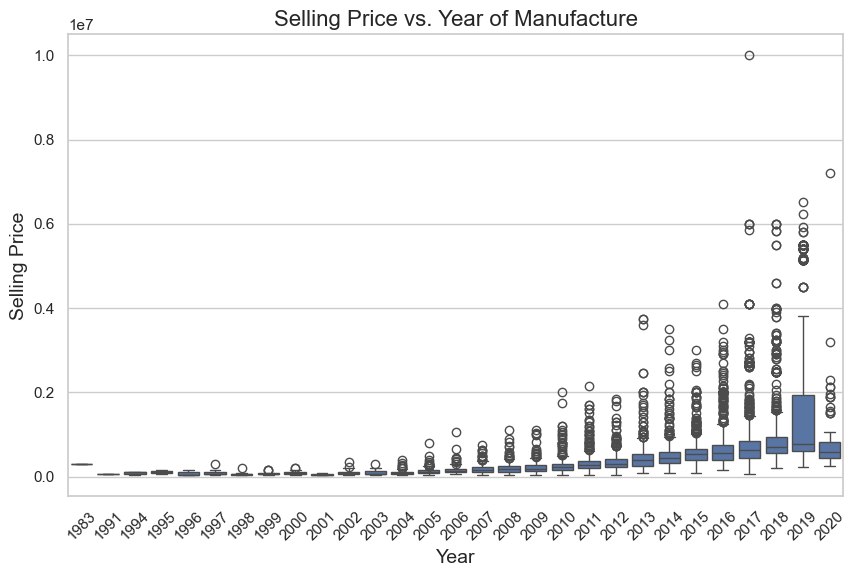

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=45)
plt.title('Selling Price vs. Year of Manufacture', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.show()


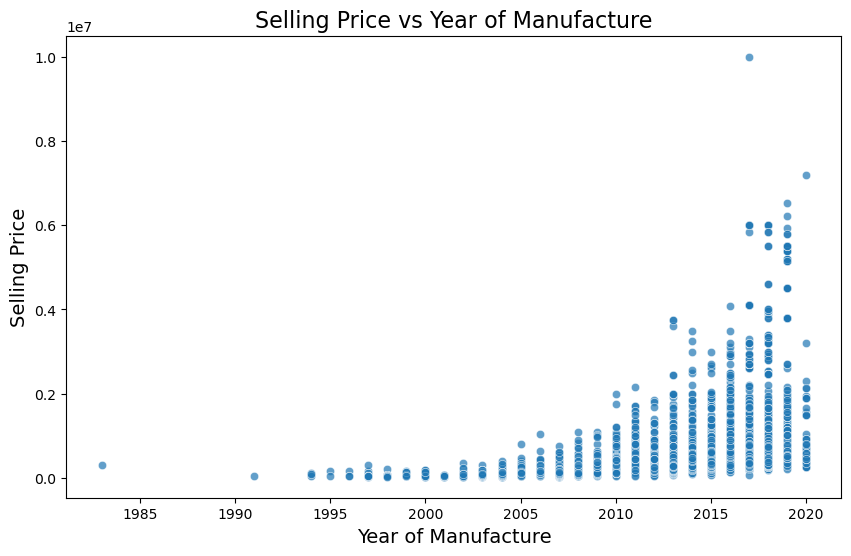

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot of selling price vs. year
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.7)

plt.title('Selling Price vs Year of Manufacture', fontsize=16)
plt.xlabel('Year of Manufacture', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)

# Show the plot
plt.show()


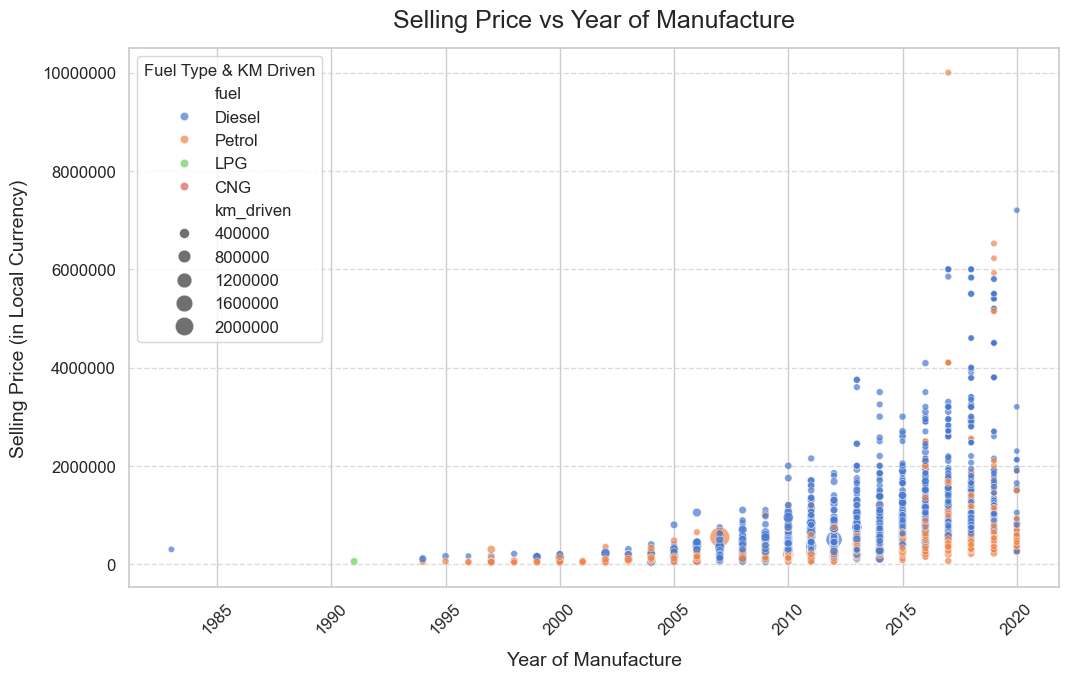

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style
sns.set(style='whitegrid')

plt.figure(figsize=(12, 7))

# Scatter plot of selling price vs year with color and size enhancements
sns.scatterplot(
    data=df, 
    x='year', 
    y='selling_price', 
    hue='fuel',  # Use color to indicate fuel type
    size='km_driven',  # Use size to reflect kilometers driven
    palette='muted', 
    sizes=(20, 200),  # Control marker sizes
    alpha=0.7, 
    legend='brief'
)

# Add titles and labels with appropriate font sizes
plt.title('Selling Price vs Year of Manufacture', fontsize=18, pad=15)
plt.xlabel('Year of Manufacture', fontsize=14, labelpad=10)
plt.ylabel('Selling Price (in Local Currency)', fontsize=14, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Place the legend in the upper left corner
plt.legend(loc='upper left', title='Fuel Type & KM Driven', fontsize=12)

# Show the plot
plt.show()


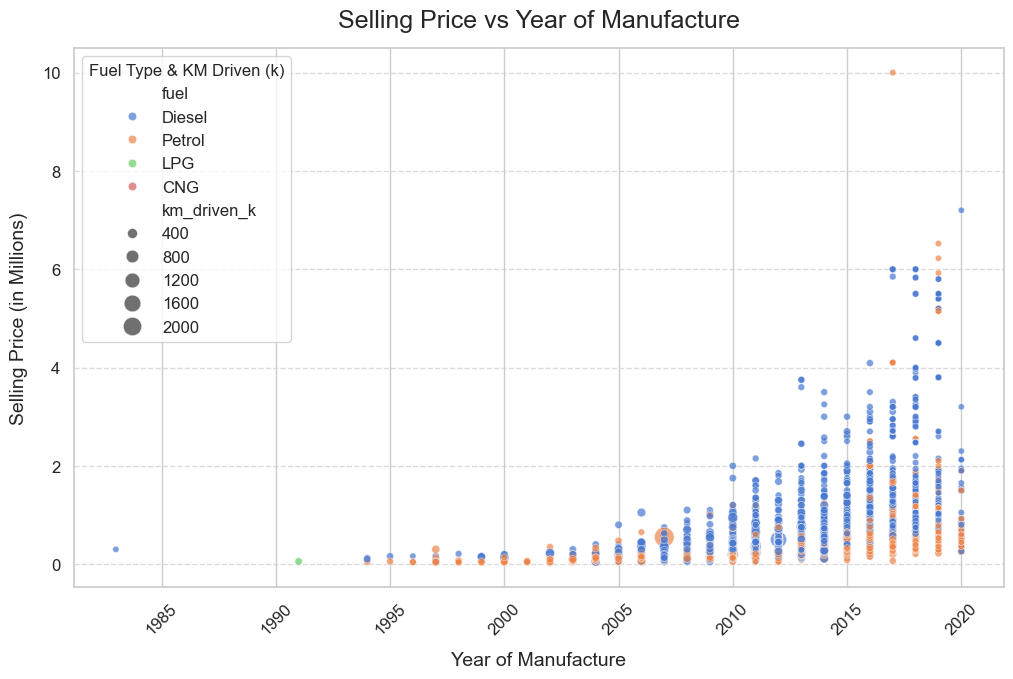

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert km_driven to thousands and selling_price to millions
df['km_driven_k'] = df['km_driven'] / 1000  # Convert to thousands
df['selling_price_million'] = df['selling_price'] / 1e6  # Convert to millions

# Set a style
sns.set(style='whitegrid')

plt.figure(figsize=(12, 7))

# Scatter plot of selling price vs year with color and size enhancements
sns.scatterplot(
    data=df, 
    x='year', 
    y='selling_price_million',  # Use selling price in millions
    hue='fuel',  # Use color to indicate fuel type
    size='km_driven_k',  # Use size to reflect kilometers driven in thousands
    palette='muted', 
    sizes=(20, 200),  # Control marker sizes
    alpha=0.7, 
    legend='brief'
)

# Add titles and labels with appropriate font sizes
plt.title('Selling Price vs Year of Manufacture', fontsize=18, pad=15)
plt.xlabel('Year of Manufacture', fontsize=14, labelpad=10)
plt.ylabel('Selling Price (in Millions)', fontsize=14, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Place the legend in the upper left corner
plt.legend(loc='upper left', title='Fuel Type & KM Driven (k)', fontsize=12)

# Show the plot
plt.show()


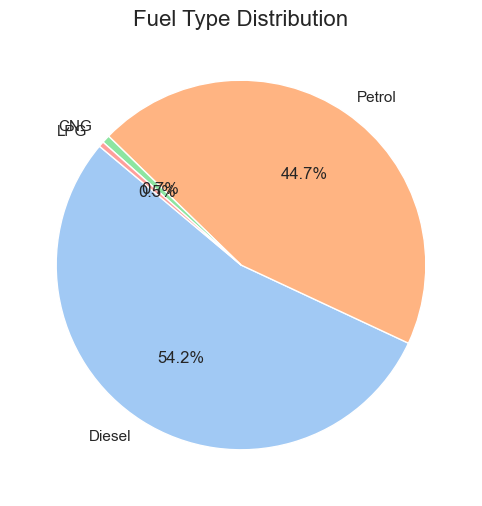

In [119]:
plt.figure(figsize=(8, 6))
df['fuel'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Fuel Type Distribution', fontsize=16)
plt.ylabel('')
plt.show()


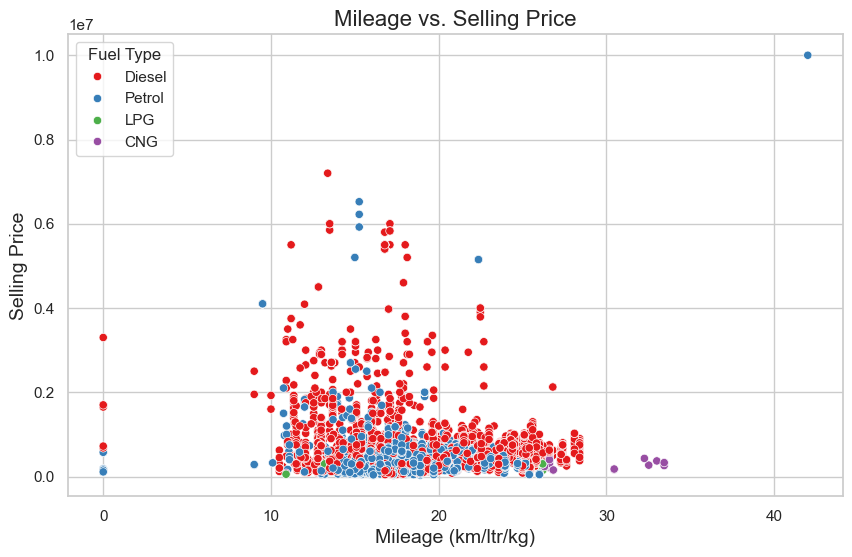

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mileage(km/ltr/kg)', y='selling_price', hue='fuel', palette='Set1')
plt.title('Mileage vs. Selling Price', fontsize=16)
plt.xlabel('Mileage (km/ltr/kg)', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.legend(title='Fuel Type')
plt.show()


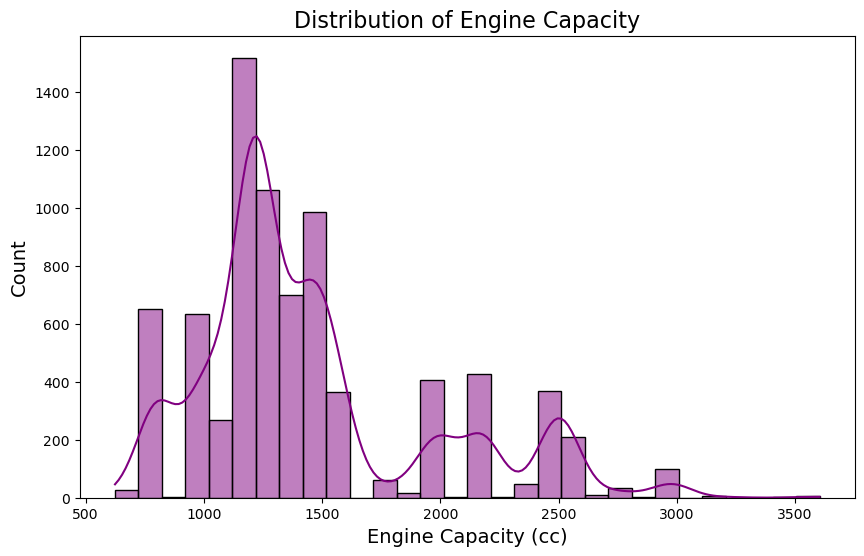

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['engine'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of Engine Capacity', fontsize=16)
plt.xlabel('Engine Capacity (cc)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [16]:
print(df['name'].value_counts())

name
Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: count, Length: 2058, dtype: int64


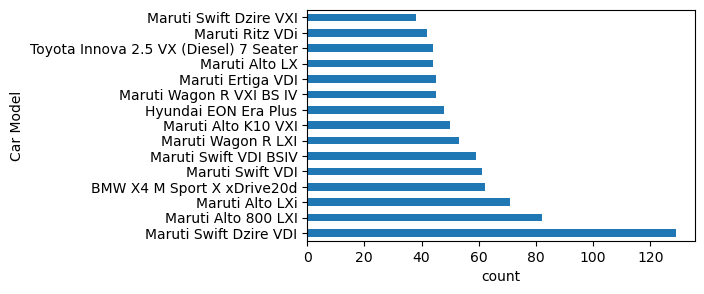

In [17]:
plt.figure(figsize=(5,3))
df['name'].value_counts().head(15).plot.barh()
plt.xlabel('count')
plt.ylabel('Car Model')
plt.show()

/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_1690/3589483605.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', 10)


NameError: name 'np' is not defined

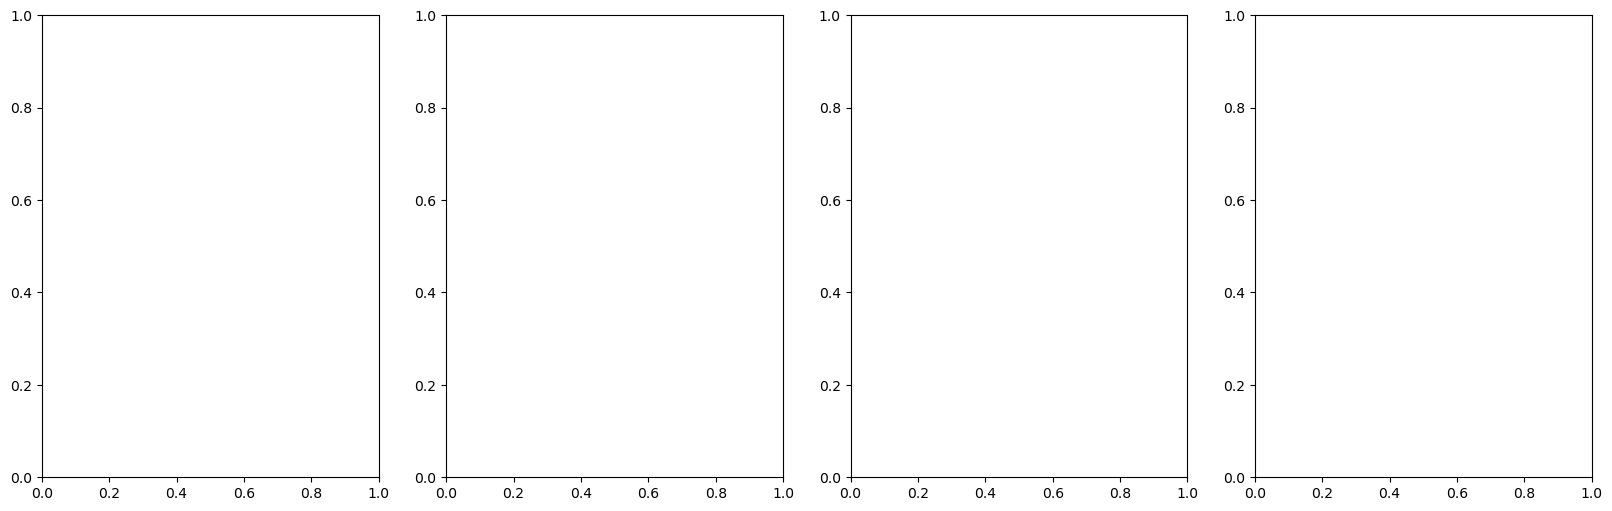

In [18]:
import matplotlib.cm as cm
categoricals = ["fuel", "seller_type", "transmission", "owner"]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

colors = cm.get_cmap('tab10', 10)

for i, j in enumerate(categoricals):
    counts = df[j].value_counts()
    counts.plot(
        kind="bar", 
        ax=axes[i], 
        color=[colors(k) for k in np.linspace(0, 1, len(counts))]
    )
    axes[i].set_ylabel("Count")  # Set y-axis label
    axes[i].set_title(j.capitalize())  # Add title for each subplot
    for container in axes[i].containers:
        axes[i].bar_label(container)

plt.tight_layout()
plt.tight_layout()
plt.show()

/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_1690/2671188537.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fuel', y='selling_price', palette='Set2')


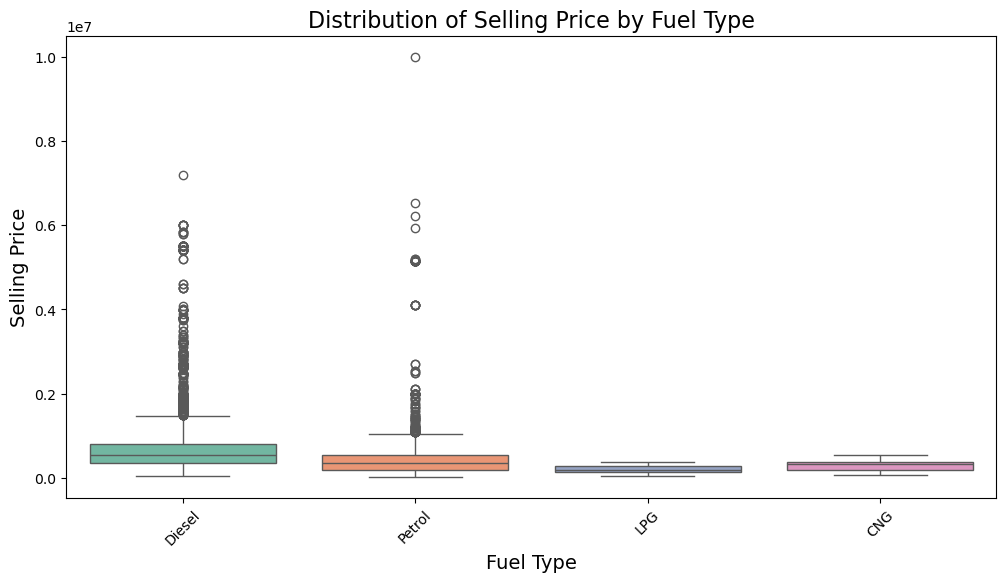

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Boxplot of selling_price by fuel type
sns.boxplot(data=df, x='fuel', y='selling_price', palette='Set2')

plt.title('Distribution of Selling Price by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)
plt.show()



/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_1690/4179563685.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='seller_type', y='selling_price', palette='Set2')


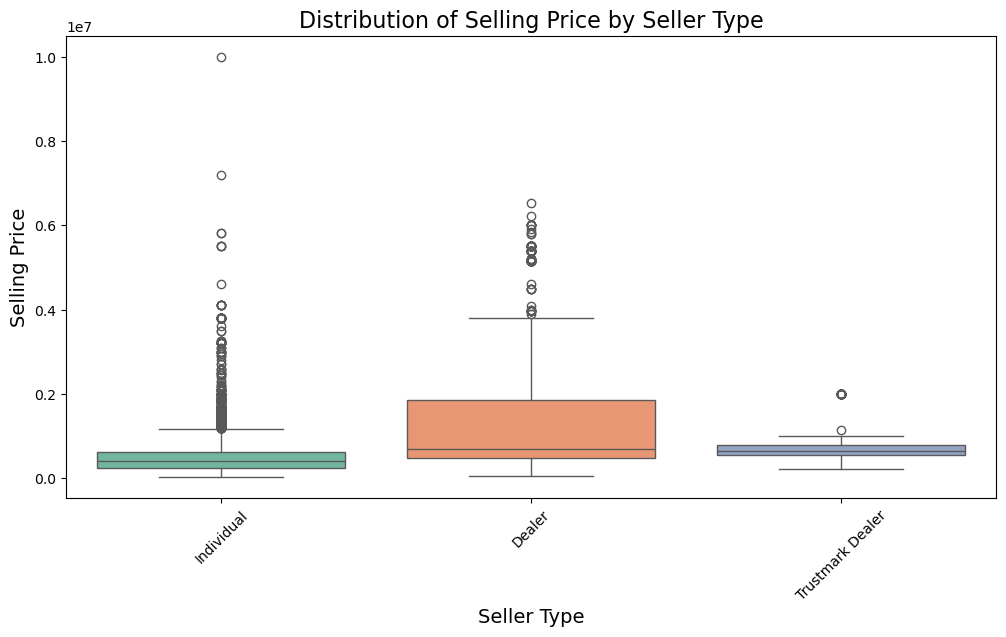

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Boxplot of selling_price by seller_type
sns.boxplot(data=df, x='seller_type', y='selling_price', palette='Set2')

plt.title('Distribution of Selling Price by Seller Type', fontsize=16)
plt.xlabel('Seller Type', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)
plt.show()


/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_1690/2293115583.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='transmission', y='selling_price', palette='Set2')


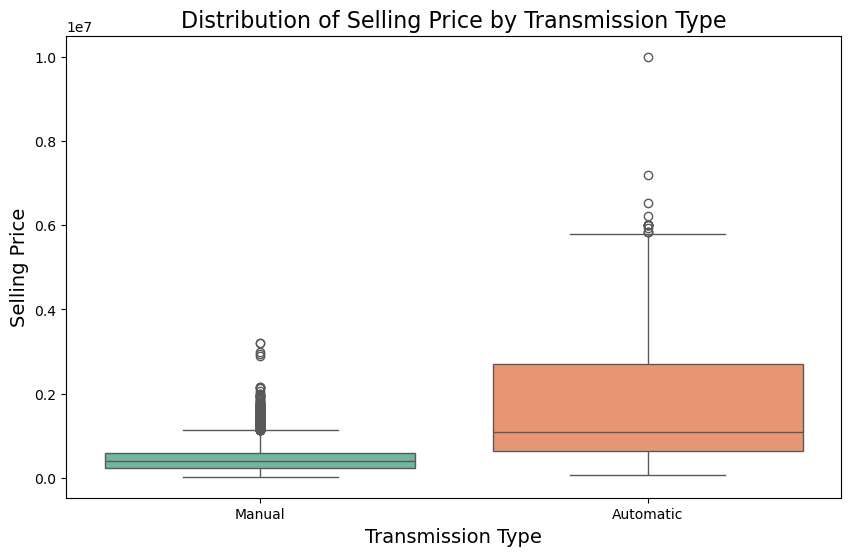

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Boxplot of selling_price by transmission type
sns.boxplot(data=df, x='transmission', y='selling_price', palette='Set2')

plt.title('Distribution of Selling Price by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)

# Show the plot
plt.show()


/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_1690/2464039767.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='transmission', y='selling_price', palette='muted')


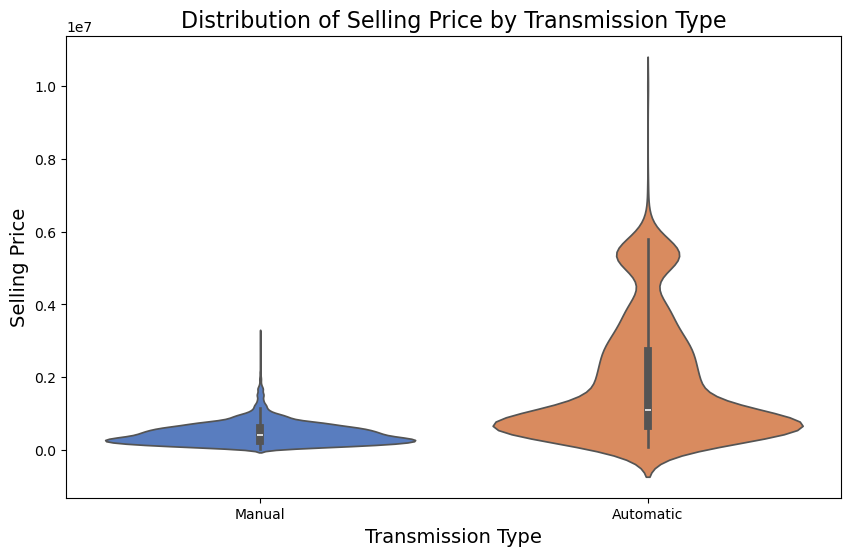

In [22]:
plt.figure(figsize=(10, 6))

# Violin plot of selling_price by transmission type
sns.violinplot(data=df, x='transmission', y='selling_price', palette='muted')

plt.title('Distribution of Selling Price by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)

# Show the plot
plt.show()


/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_1690/340288730.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='owner', y='selling_price', palette='Set2')


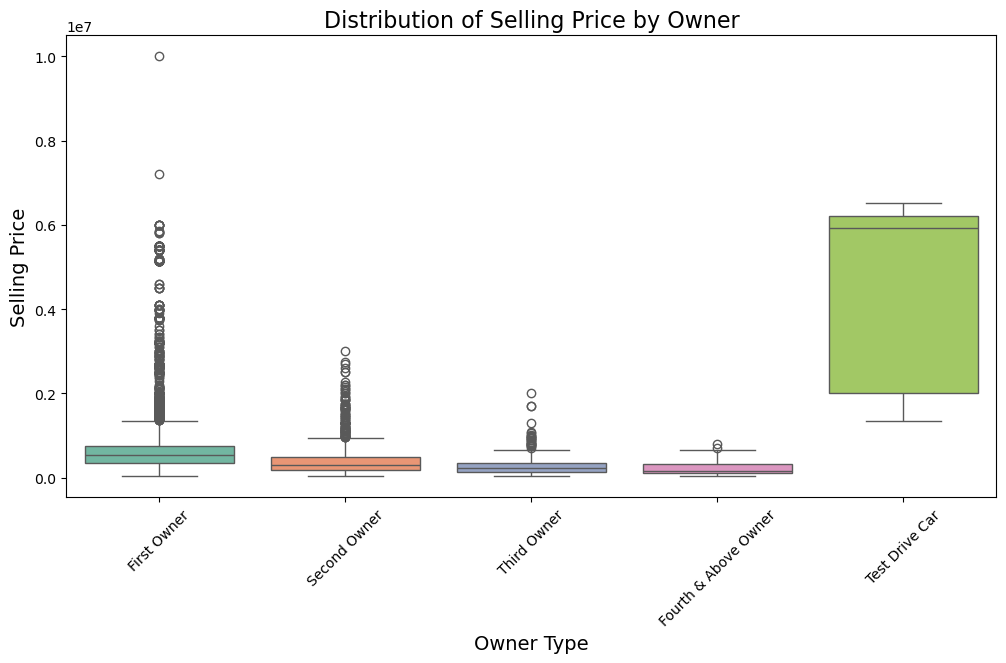

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Boxplot of selling_price by owner
sns.boxplot(data=df, x='owner', y='selling_price', palette='Set2')

plt.title('Distribution of Selling Price by Owner', fontsize=16)
plt.xlabel('Owner Type', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_1690/512423954.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='owner', y='selling_price', palette='Set2')


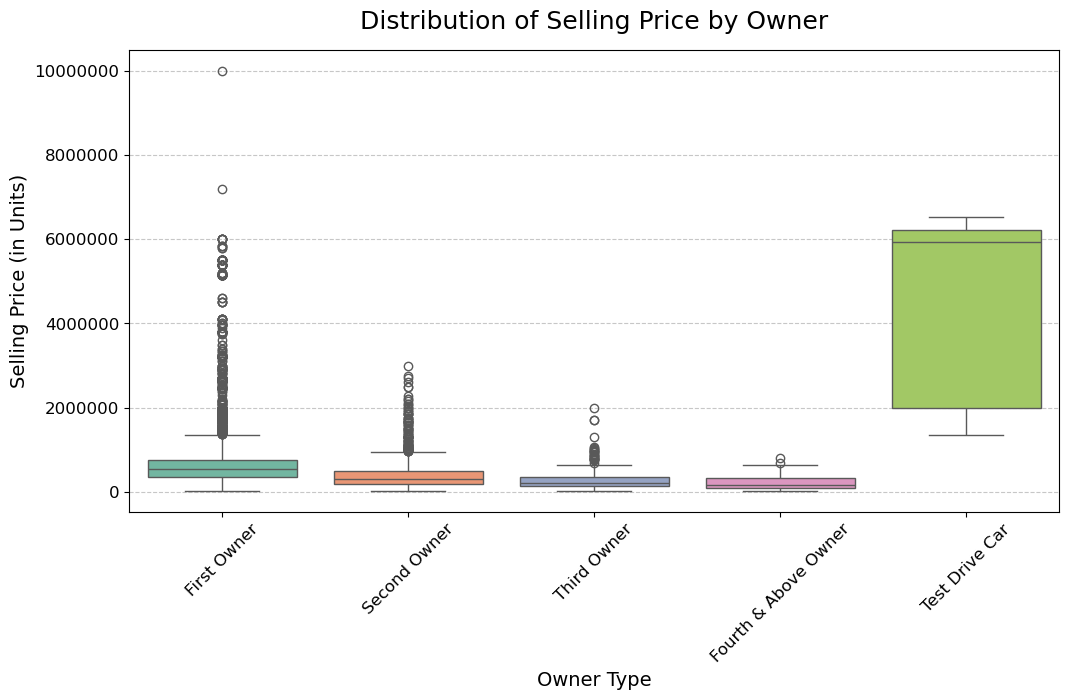

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Improved boxplot of selling_price by owner
sns.boxplot(data=df, x='owner', y='selling_price', palette='Set2')

# Set title and labels with improved font sizes
plt.title('Distribution of Selling Price by Owner', fontsize=18, pad=15)
plt.xlabel('Owner Type', fontsize=14)
plt.ylabel('Selling Price (in Units)', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


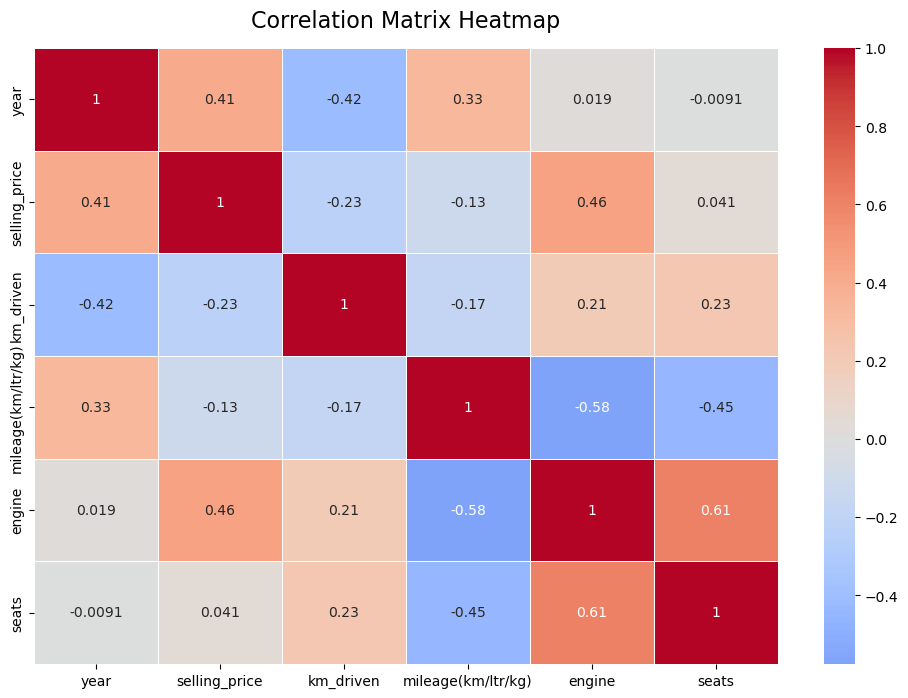

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,  # Display correlation values in cells
    cmap='coolwarm',  # Diverging colormap
    center=0,  # Center at 0 for balanced color gradient
    linewidths=0.5,  # Line width between cells
    annot_kws={"size": 10}  # Font size for annotations
)

# Add a title
plt.title('Correlation Matrix Heatmap', fontsize=16, pad=15)

plt.show()



In [29]:
# Step 1: Replace empty strings and convert to float, using NaN where necessary
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

# Step 2: Calculate the median of non-NaN values
median_value = df['max_power'].median()

# Step 3: Fill NaN values with the median
df['max_power'] = df['max_power'].fillna(median_value)

# Display the DataFrame to check results
print(df)

                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage(km

In [32]:
# Step 1: Replace empty strings and convert to float, using NaN where necessary
df['seats'] = pd.to_numeric(df['seats'], errors='coerce')

# Step 2: Calculate the median of non-NaN values
median_value = df['seats'].median()

# Step 3: Fill NaN values with the median
df['seats'] = df['seats'].fillna(median_value)

# Display the DataFrame to check results
print(df)

                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage(km

In [33]:
# Step 1: Replace empty strings and convert to float, using NaN where necessary
df['mileage(km/ltr/kg)'] = pd.to_numeric(df['mileage(km/ltr/kg)'], errors='coerce')

# Step 2: Calculate the median of non-NaN values
median_value = df['mileage(km/ltr/kg)'].median()

# Step 3: Fill NaN values with the median
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(median_value)

# Display the DataFrame to check results
print(df)

                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage(km

In [34]:
# Step 1: Replace empty strings and convert to float, using NaN where necessary
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')

# Step 2: Calculate the median of non-NaN values
median_value = df['engine'].median()

# Step 3: Fill NaN values with the median
df['engine'] = df['engine'].fillna(median_value)

# Display the DataFrame to check results
print(df)

                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage(km

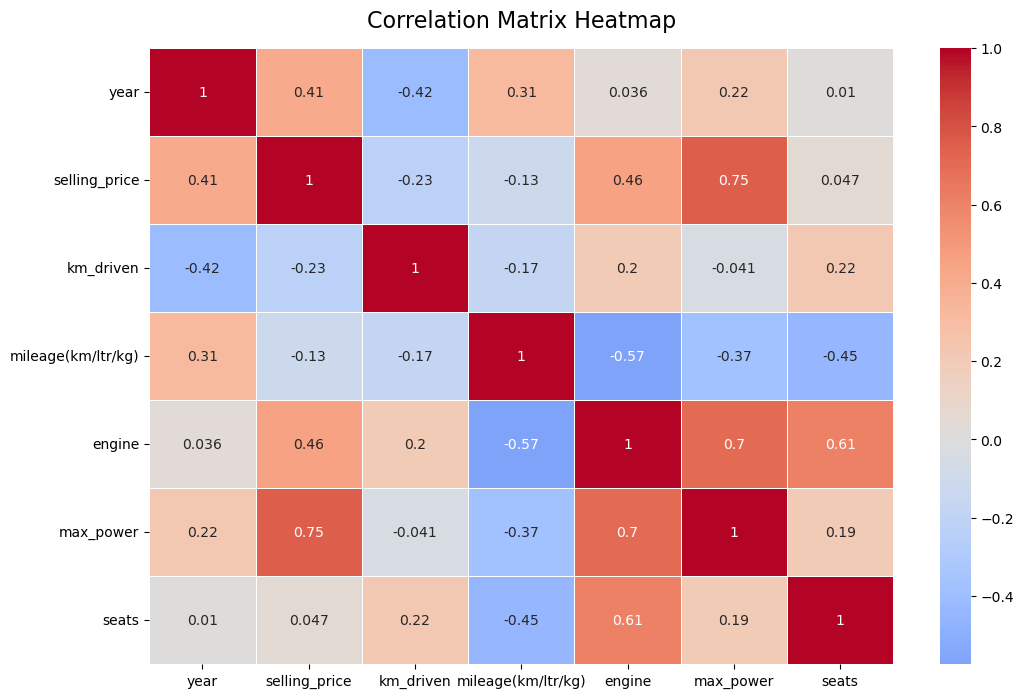

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,  # Display correlation values in cells
    cmap='coolwarm',  # Diverging colormap
    center=0,  # Center at 0 for balanced color gradient
    linewidths=0.5,  # Line width between cells
    annot_kws={"size": 10}  # Font size for annotations
)

# Add a title
plt.title('Correlation Matrix Heatmap', fontsize=16, pad=15)

plt.show()

In [36]:
y = df['selling_price']
X = df.loc[:, df.columns != 'selling_price'] 
print(y)
print(X.head())

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64
                           name  year  km_driven    fuel seller_type  \
0        Maruti Swift Dzire VDI  2014     145500  Diesel  Individual   
1  Skoda Rapid 1.5 TDI Ambition  2014     120000  Diesel  Individual   
2      Honda City 2017-2020 EXi  2006     140000  Petrol  Individual   
3     Hyundai i20 Sportz Diesel  2010     127000  Diesel  Individual   
4        Maruti Swift VXI BSIII  2007     120000  Petrol  Individual   

  transmission         owner  mileage(km/ltr/kg)   engine  max_power  seats  
0       Manual   First Owner               23.40 1,248.00      74.00   5.00  
1       Manual  Second Owner               21.14 1,498.00     103.52   5.00  
2       Manual   Third Owner               17.70 1,497.00      78.00   5.00  
3       Manual   First Owner              

In [37]:
from sklearn.model_selection import train_test_split
# Define the function basic_split with a more flexible size validation
def basic_split(X, y, train_size, val_size, test_size, random_state):
    # Test input integrity
    if train_size + val_size + test_size != 1:
        raise ValueError("The sum of train_size, val_size, and test_size must equal 1.")
    
    if not isinstance(random_state, int):
        raise ValueError("random_state must be an integer.")
    
    # first split to separate out the training set
    X_train, X_other, y_train, y_other = train_test_split(X,y,\
                    train_size = 0.6,random_state = random_state)
    
    # Calculate test size as a proportion of the remaining data (temp)
    test_size_adjusted = test_size / (val_size + test_size)
    
    # second split to separate out the validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,\
                    train_size = test_size_adjusted,random_state = random_state)
    
    # Return the splits
    return X_train, y_train, X_val, y_val, X_test, y_test

# Apply the function with the same parameters
X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X, y, train_size=0.6, val_size=0.2, test_size=0.2, random_state=42)

# Output the head of each set to confirm the split
print(X_train.head())
print(X_val.head())
print(X_test.head())

                                    name  year  km_driven    fuel seller_type  \
1222                      Maruti Alto LX  2006      40000  Petrol  Individual   
6587          BMW X4 M Sport X xDrive20d  2019       7500  Diesel      Dealer   
4932         Maruti Celerio ZXI Optional  2017      59500  Petrol  Individual   
5841  Hyundai Elite i20 Sportz Plus BSIV  2019      19000  Petrol  Individual   
6576               Tata Safari Storme EX  2015     110000  Diesel  Individual   

     transmission         owner  mileage(km/ltr/kg)   engine  max_power  seats  
1222       Manual   First Owner               19.70   796.00      46.30   5.00  
6587    Automatic   First Owner               16.78 1,995.00     190.00   5.00  
4932       Manual  Second Owner               23.10   998.00      67.04   5.00  
5841       Manual   First Owner               18.60 1,197.00      81.86   5.00  
6576       Manual   First Owner               14.10 2,179.00     147.94   7.00  
                           

In [42]:
# collect which encoder to use on each feature
# needs to be done manually

import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

ordinal_ftrs = ['owner'] 
ordinal_cats = [['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']]
onehot_ftrs = ['fuel', 'seller_type', 'transmission']
minmax_ftrs = []
std_ftrs = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(4876, 11)
(4876, 16)
[[ 0.          0.          0.         ... -1.32200622 -1.28233077
  -0.43099525]
 [ 0.          0.          1.         ...  1.09542833  2.84815773
  -0.43099525]
 [ 1.          0.          0.         ... -0.91473201 -0.68618371
  -0.43099525]
 ...
 [ 0.          0.          0.         ... -0.51350643 -0.26106245
  -0.43099525]
 [ 0.          0.          1.         ... -0.41067977 -0.48555177
  -0.43099525]
 [ 1.          0.          0.         ... -1.32200622 -1.54964839
  -1.49344865]]


In [43]:
preprocessor.get_feature_names_out()

array(['ord__owner', 'onehot__fuel_CNG', 'onehot__fuel_Diesel',
       'onehot__fuel_LPG', 'onehot__fuel_Petrol',
       'onehot__seller_type_Dealer', 'onehot__seller_type_Individual',
       'onehot__seller_type_Trustmark Dealer',
       'onehot__transmission_Automatic', 'onehot__transmission_Manual',
       'std__year', 'std__km_driven', 'std__mileage(km/ltr/kg)',
       'std__engine', 'std__max_power', 'std__seats'], dtype=object)